In [11]:
# Structures imports
from src.kdtree.kdtree import KDTree
import src.kdtree.kdtree_visualizer as kdvis
from src.quadtree.quadtree import Quadtree
import src.quadtree.quadtree_visualizer as quadvis
from src.quadtree.util.Geometry import Area, Point

from random import uniform
from collections import deque
from typing import Dict, List
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import matplotlib.animation as animation


# Wykorzystanie drzew KD i QuadTree do znajdywania punktów na płaszczyźnie
Drzewa KD (ang. k-d trees) i QuadTree to struktury danych wykorzystywane do efektywnego zarządzania i przeszukiwania punktów w przestrzeni dwuwymiarowej. Obie struktury są szczególnie przydatne w aplikacjach, gdzie konieczne jest szybkie znajdowanie punktów w określonym obszarze, takich jak grafika komputerowa, geoinformacja czy systemy nawigacyjne.

### Drzewa KD
Drzewo KD to struktura danych, która dzieli przestrzeń na półprzestrzenie za pomocą hiperpłaszczyzn. Każdy węzeł drzewa KD reprezentuje punkt w przestrzeni, a jego dzieci dzielą przestrzeń na dwie części wzdłuż jednej z osi współrzędnych, co umożliwia szybkie przeszukiwanie przestrzeni w czasie logarytmicznym.

### QuadTree
QuadTree to struktura danych, która dzieli przestrzeń na podprzestrzenie będące kwadratmi. Podczas podziału, jeżeli takowy następuje w danym kwadracie, kwadrat ten jest dzielony na cztery równej wielkości kwadraty wypełniające cały obszar oryginalnej figury. Opisane wydzielanie podprzestrzeni umożliwia wyszukiwanie, czy punkt do owej przestrzeni należy, w czasie logartymicznym.

Obie struktury danych mają swoje zalety i wady, a wybór odpowiedniej zależy od specyfiki problemu oraz charakterystyki danych. W dalszej części omówione są mechanizmy działania struktur KD i QuadTree do znajdywania punktów na płaszczyźnie.

### Generowanie punktów dla wizualicji i testów

In [12]:
def base_function(x):
    return 0.05*x+0.05

In [13]:
def quadratic_function(x,a=1,b=1,c=1):
    return a*x**2 + b*x + c

In [14]:
def points_generator(n, min_x = -10**3, max_x = 10**3, min_y = -10**3, max_y = 10**3):
    return [ (uniform(min_x,max_x),uniform(min_y,max_y)) for _ in range(n) ]

In [28]:
def line_generator(n, k, min_x = -10**3, max_x = 10**3, min_noise = -10, max_noise = 10, function=base_function):
    result = []
    for _ in range(n):
        x = uniform(min_x,max_x)
        noise = uniform(min_noise,max_noise)
        result.append((x,function(x)+noise))
    return result + points_generator(n = k, min_x = min_x, max_x = max_x, min_y = min(function(min_x),min_x), max_y = max(function(max_x),max_x))

In [29]:
# Przykładowe punkty
points_set = points_generator(100)

# Drzewo KD

## Algorytm drzewa KD
<ol>
<li>
Algorytm inicjalizuje puste drzewo z korzeniem z wartością <span style="color:cyan">NULL</span>. W kodzie realizuje to konstruktor klasy `KDTree`, gdzie korzeń (`root`) ustawiany jest na `None`.
</li>
<li>
Definiujemy funkcję rekurencyjną <span style="color:cyan">`build_tree`</span>, która odpowiada za budowę drzewa KD:
<ol>
<li>
Dla danej głębokości `depth`, ustalamy aktualny wymiar (`dimension`) na podstawie reszty z dzielenia głębokości przez liczbę wymiarów (`k`). Pozwala to na cykliczne przechodzenie przez wymiary.
</li>
<li>
Sortujemy podaną tablicę punktów według wartości w bieżącym wymiarze. Następnie wybieramy medianę jako punkt, który będzie węzłem w bieżącej iteracji.
</li>
<li>
Tworzymy nowy węzeł (`Node`) na podstawie mediany, a jego lewego i prawego potomka ustalamy rekurencyjnie, dzieląc tablicę na podtablice: 
<ul>
<li>lewa część zawiera punkty o wartościach mniejszych od mediany,</li>
<li>prawa część zawiera punkty o wartościach większych.</li>
</ul>
</li>
<li>
Rekurencja kończy się, gdy lista punktów jest pusta (`return None`) lub zawiera tylko jeden punkt (tworzymy liść drzewa).
</li>
</ol>
</li>
<li>
Drzewo jest budowane od góry (korzenia) do dołu, przechodząc przez kolejne poziomy. Proces budowy jest logarytmiczny w idealnym przypadku (dla zrównoważonego drzewa).
</li>
<li>
Dodatkowe funkcje:
<ol>
<li>
<span style="color:cyan">`add_point`</span> i <span style="color:cyan">`delete_point`</span> - są przygotowane do dodawania i usuwania punktów, jednak ich implementacja w podanym kodzie jest pusta.
</li>
<li>
<span style="color:cyan">`get_points_in_rectangle`</span> - funkcja do wyszukiwania punktów w określonym prostokącie, korzysta z rekurencji i sprawdza, czy dany węzeł znajduje się wewnątrz prostokąta.
</li>
<li>
<span style="color:cyan">`bst_to_list`</span> - zamienia całe drzewo na listę poprzez przechodzenie w porządku in-order.
</li>
</ol>
</li>
</ol>


In [30]:
points1 = [(np.float64(0.18145161290322576), np.float64(0.2959677419354838)), (np.float64(0.6693548387096775), np.float64(0.07251082251082264)), (np.float64(-0.13306451612903225), np.float64(0.48548387096774204)), (np.float64(-0.028225806451612767), np.float64(-0.006451612903225823)), (np.float64(0.41532258064516125), np.float64(-0.09516129032258058)), (np.float64(-0.27419354838709675), np.float64(-0.0669354838709677)), (np.float64(-0.27822580645161277), np.float64(-0.07096774193548383)), (np.float64(0.153225806451613), np.float64(-0.48484848484848486)), (np.float64(0.14516129032258074), np.float64(-0.474025974025974)), (np.float64(-0.5120967741935484), np.float64(0.14826839826839833)), (np.float64(-0.5927419354838709), np.float64(-0.27922077922077926)), (np.float64(-0.3588709677419355), np.float64(-0.38203463203463206)), (np.float64(-0.4677419354838709), np.float64(-0.09112903225806446)), (np.float64(0.653225806451613), np.float64(0.04596774193548381)), (np.float64(-0.24596774193548376), np.float64(-0.3129032258064516)), (np.float64(0.3306451612903225), np.float64(-0.29004329004329)), (np.float64(0.14919354838709675), np.float64(0.2919354838709678)), (np.float64(-0.185483870967742), np.float64(-0.1114718614718615)), (np.float64(0.23790322580645173), np.float64(-0.5281385281385281)), (np.float64(0.6290322580645162), np.float64(-0.16774193548387095)), (np.float64(0.7540322580645162), np.float64(-0.1872294372294372)), (np.float64(0.7540322580645162), np.float64(-0.1872294372294372)), (np.float64(0.6935483870967742), np.float64(-0.17640692640692635)), (np.float64(0.7177419354838708), np.float64(-0.17099567099567103)), (np.float64(0.8306451612903227), np.float64(-0.1655844155844155)), (np.float64(0.8306451612903227), np.float64(-0.23051948051948057)), (np.float64(0.8306451612903227), np.float64(-0.23051948051948057)), (np.float64(0.8306451612903227), np.float64(-0.23051948051948057)), (np.float64(0.6653225806451613), np.float64(0.045454545454545414)), (np.float64(0.6733870967741935), np.float64(-0.24675324675324672)), (np.float64(0.9032258064516128), np.float64(-0.22510822510822504)), (np.float64(0.38306451612903225), np.float64(-0.4902597402597403)), (np.float64(-0.5806451612903225), np.float64(-0.4145021645021645)), (np.float64(-0.8629032258064515), np.float64(-0.48484848484848486))]
points = [(-2,3),(-1,2),(3,1),(2,2),(1,4),(1,-2),(1,2)]
tree = KDTree()
tree.build_tree(points1)

print(tree.get_points_in_rectangle((0.15,-0.6),(0.5,-0.4)))


Depth 0, Dimension 0, Median (0.3306451612903225, -0.29004329004329)
Depth 1, Dimension 1, Median (-0.185483870967742, -0.1114718614718615)
Depth 2, Dimension 0, Median (-0.24596774193548376, -0.3129032258064516)
Depth 3, Dimension 1, Median (-0.3588709677419355, -0.38203463203463206)
Depth 4, Dimension 0, Median (-0.5806451612903225, -0.4145021645021645)
Depth 3, Dimension 1, Median (0.153225806451613, -0.48484848484848486)
Depth 2, Dimension 0, Median (-0.13306451612903225, 0.48548387096774204)
Depth 3, Dimension 1, Median (-0.27419354838709675, -0.0669354838709677)
Depth 4, Dimension 0, Median (-0.27822580645161277, -0.07096774193548383)
Depth 3, Dimension 1, Median (0.14919354838709675, 0.2919354838709678)
Depth 1, Dimension 1, Median (0.6935483870967742, -0.17640692640692635)
Depth 2, Dimension 0, Median (0.8306451612903227, -0.23051948051948057)
Depth 3, Dimension 1, Median (0.7540322580645162, -0.1872294372294372)
Depth 4, Dimension 0, Median (0.6733870967741935, -0.246753246753

## Wizualizacja krokowa algorytmu podziału punktów na drzwo KD

In [31]:
def plot_kdtree_splits(ax,node,depth=0,index=0,bounds=None):
    """
    Recursively plot the splitting lines of a KDTree.
    Parameters:
        ax: The matplotlib Axes object to draw on.
        node: The current Node of the KDTree.
        depth: The current depth in the tree.
        bounds: The bounding box for the current region, in the form [(xmin, xmax), (ymin, ymax)].
    """
    if node is None or node.value is None:
        return
    if bounds is None:
        # Initialize bounds as infinite in both x and y dimensions
        bounds = [(-4, 4), (-4, 4)]
        axis = depth % 2 # W are drawing on a plane, so we have to assume two dimensions
        x, y = node.value[0], node.value[1]
        if axis == 0:  # Vertical line (split by x)
            print(f"Plotting vertical {node.value} {x} {x}")
            ax.scatter(x, y, color="blue", s=5, label="Wprowadzone punkty")
            ax.plot([x, x], [bounds[1][0], bounds[1][1]], color='blue', linestyle='--', linewidth=1)
            ax.autoscale()
            plt.savefig(f"split_{index}.jpg")
            newBoundsLeft = [(bounds[0][0], x), bounds[1]]
            newBoundRight = [(x, bounds[0][1]), bounds[1]]
            plot_kdtree_splits(ax,node.left, depth + 1, 2*index+1,newBoundsLeft)
            plot_kdtree_splits(ax,node.right, depth + 1, 2*index+2,newBoundRight)
        else:  # Horizontal line (split by y)
            print(f"Plotting horizontal {node.value} {x} {x}")
            ax.scatter(x, y, color="blue", s=5, label="Wprowadzone punkty")
            ax.plot([bounds[0][0], bounds[0][1]], [y, y], color='yellow', linestyle='--', linewidth=1)
            ax.autoscale()
            plt.savefig(f"split_{index}.jpg")
            newBoundsLeft = [bounds[0], (bounds[1][0], y)]
            newBoundRight = [bounds[0], (y, bounds[1][1])]
            plot_kdtree_splits(ax,node.left, depth + 1, 2*index+1, newBoundsLeft)
            plot_kdtree_splits(ax,node.right, depth + 1, 2*index+2, newBoundRight)


def plot_kdtree_splits_bfs(ax, node, depth=0, index = 0, bounds=None,points=None,gif_name="tree_building.gif"):
    """
    Recursively plot the splitting lines of a KDTree.
    Parameters:
        ax: The matplotlib Axes object to draw on.
        node: The current Node of the KDTree.
        depth: The current depth in the tree.
        bounds: The bounding box for the current region, in the form [(xmin, xmax), (ymin, ymax)].
    """
    filenames = []
    addPoints = False
    if node is None or node.value is None:
        return
    if points is None:
        points = []
        addPoints = True
    if bounds is None:
        bounds = [(-1, 1), (-1, 1)]

    queue = deque([(node, depth, bounds, 0)])  # (node, depth, bounds, index)
    def plot_split(ax, value, bounds, index,dimension,points):
        nonlocal filenames
        x, y = value
        xBounds, yBounds = bounds
        xPoints, yPoints = zip(*points)
        ax.scatter(xPoints, yPoints, color="blue", s=5, label="Wprowadzone punkty")
        ax.plot(xBounds, yBounds, color='blue' if dimension == 0 else 'red', linestyle='--', linewidth=1)
        ax.autoscale()
        filename = f"split_{index}.jpg"
        plt.savefig(filename)
        filenames.append(filename)

    while queue:
        currentNode, currentDepth, currentBounds, currentIndex = queue.popleft()

        if currentNode is None or currentNode.value is None:
            continue
        axis = currentDepth % 2
        x, y = currentNode.value

        if axis == 0:  # Vertical line (split by x-coordinate)
            split_line = ([x, x], [currentBounds[1][0], currentBounds[1][1]])
            newBoundsLeft = [(currentBounds[0][0], x), currentBounds[1]]
            newBoundsRight = [(x, currentBounds[0][1]), currentBounds[1]]
        else:  # Horizontal line (split by y-coordinate)
            split_line = ([currentBounds[0][0], currentBounds[0][1]], [y, y])
            newBoundsLeft = [currentBounds[0], (currentBounds[1][0], y)]
            newBoundsRight = [currentBounds[0], (y, currentBounds[1][1])]
        if addPoints:
            points.append(node.value)
        # Plot the splitting line and the point
        plot_split(ax, currentNode.value, split_line, currentIndex, axis, points)

        # Enqueue child nodes with updated bounds
        queue.append((currentNode.left, currentDepth + 1, newBoundsLeft, 2 * currentIndex + 1))
        queue.append((currentNode.right, currentDepth + 1, newBoundsRight, 2 * currentIndex + 2))
        
    images = [plt.imread(fname) for fname in filenames]
    plt.figure()
    ani = animation.ArtistAnimation(plt.gcf(), [[plt.imshow(img)] for img in images], interval=500)
    ani.save(gif_name, writer='pillow')
    for fname in filenames:
        os.remove(fname)



Depth 0, Dimension 0, Median (38.465528056619405, 139.9948275821621)
Depth 1, Dimension 1, Median (-558.5661890201685, 105.22852948339778)
Depth 2, Dimension 0, Median (-364.8526423627336, -166.33896277996428)
Depth 3, Dimension 1, Median (-630.7500609976038, -440.67084302462774)
Depth 4, Dimension 0, Median (-918.3447969282919, -544.7375108042975)
Depth 5, Dimension 1, Median (-996.1044769306588, -791.3358565915842)
Depth 5, Dimension 1, Median (-758.1782649527406, -630.2222576017766)
Depth 4, Dimension 0, Median (-692.8300198857949, -162.159355971752)
Depth 5, Dimension 1, Median (-753.5512260018434, -52.46080323826425)
Depth 5, Dimension 1, Median (-651.0407897503629, -251.937388005466)
Depth 3, Dimension 1, Median (-289.59970545622207, -302.45093972432005)
Depth 4, Dimension 0, Median (-106.98028287825309, -970.5687412747603)
Depth 5, Dimension 1, Median (-161.49010764880552, -583.7718297939754)
Depth 5, Dimension 1, Median (-42.080547351676955, -785.162190437284)
Depth 4, Dimensio

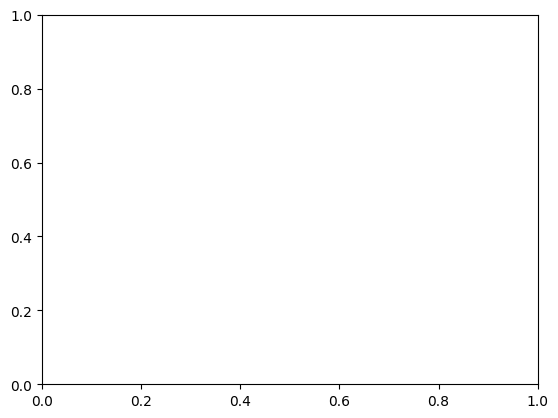

In [32]:
fig, ax = plt.subplots()
tree2 = KDTree()
tree2.build_tree(points_set)
min_point_x = min(points_set,key=lambda x:x[0])[0]
max_point_x = max(points_set,key=lambda x:x[0])[0]
min_point_y = min(points_set,key=lambda x:x[1])[1]
max_point_y = max(points_set,key=lambda x:x[1])[1]
offset_x = (max_point_x-min_point_x)*0.1
offset_y = (max_point_y-min_point_y)*0.1
initial_bounds = ((min_point_x-offset_x,max_point_x+offset_x),(min_point_y-offset_y,max_point_y+offset_y))
# plot_kdtree_splits_bfs(ax,tree2.root, bounds=initial_bounds,points=points_set)

# Drzewo Czwórkowe (Quadtree)

# Algorytm Drzewa Czwórkowego

### Inicjalizacja drzewa Quadtree
Algorytm inicjalizuje puste drzewo z korzeniem, który reprezentuje całą przestrzeń 2D. W kodzie realizuje to konstruktor klasy <span style="color:cyan">Quadtree</span>, gdzie korzeń (`root`) jest instancją klasy <span style="color:cyan">QuadtreeNode</span>.

### 1. Wstawianie punktów
Definiujemy funkcję  <span style="color:cyan">insert</span>, która odpowiada za wstawianie punktów do drzewa Quadtree:
  - Jeśli liczba punktów w bieżącym węźle nie przekracza maksymalnej pojemności ( <span style="color:cyan">max_cardinality</span>), punkty są dodawane do tego węzła.
  - Jeśli liczba punktów przekracza maksymalną pojemność, węzeł jest dodatkowo dzielony na cztery równe części (kwadranty): NW, NE, SW, SE.
  - Tworzone są nowe węzły potomne dla każdego kwadrantu.
  - Punkty z bieżącego węzła są dystrybuowane do odpowiednich węzłów potomnych na podstawie ich współrzędnych.

### 2. Podział węzła (subdivide)
Funkcja  <span style="color:cyan">_subdivide</span> dzieli bieżący węzeł na cztery równe kwadranty:
  - Środkowe współrzędne ( <span style="color:cyan">x_mid</span>,  <span style="color:cyan">y_mid</span>) są obliczane jako średnia wartości współrzędnych dolnego lewego i górnego prawego rogu obszaru węzła.
  - Tworzone są cztery nowe obszary dla węzłów potomnych: NW, NE, SW, SE.
  - Tworzone są nowe węzły potomne dla każdego z czterech obszarów.

### 3. Rozdział punktów (distribute_points)
Po przekroczeniu maksymalnej pojemności i ewentualnym podziale, punkty rozdzielane są z bieżącego węzła do odpowiednich węzłów potomnych, dla każdego punktu sprawdzając, do którego kwadrantu należy.

### 4. Wyszukiwanie punktów w obszarze (find_points_in_area)
Funkcja  <span style="color:cyan">find_points_in_area</span> znajduje wszystkie punkty zawarte w danym obszarze:
  - Funkcja  <span style="color:cyan">_find_points_in_area</span> rekurencyjnie przeszukuje węzły drzewa, sprawdzając, czy dany obszar zawiera się w obszarze węzła lub przecina się z nim.
  - Jeśli obszar węzła zawiera się w obszarze wyszukiwania, wszystkie punkty z tego węzła są dodawane do wyniku.
  - Jeśli obszar węzła przecina się z obszarem wyszukiwania, punkty są sprawdzane indywidualnie i dodawane do wyniku, jeśli znajdują się w obszarze wyszukiwania.

Drzewo Quadtree jest budowane od góry (korzenia) do dołu, przechodząc przez kolejne poziomy. Złożoność czasowa tworzenia całości struktury Quadtree o głębokości drzewa $d$ oraz liczby punktów $n$ wynosi $O((d+1) \cdot n)$.

# Wizualizacja algorytmu podziału punktów struktury Quadtree

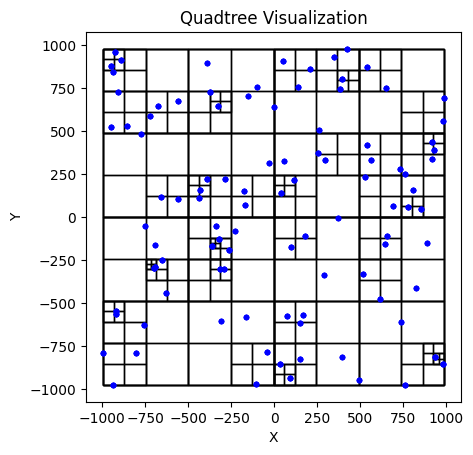

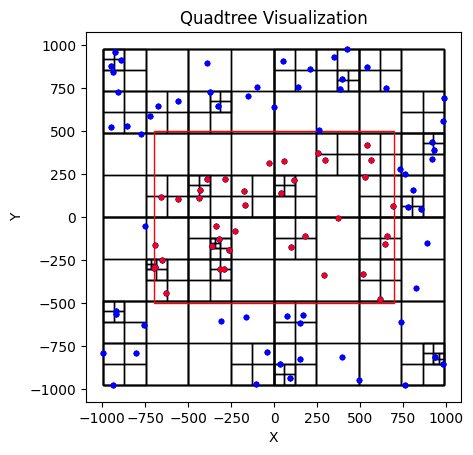

In [43]:
QT = Quadtree([Point(x[0],x[1]) for x in points_set])
quadvis.QuadTreeVisualizer.draw_static_plot(QT)
selected_area = Area(Point(-700,-500), Point(700,500))
quadvis.QuadTreeVisualizer.draw_static_plot(QT, selected_area)

### Interaktywne wprowadzanie punktów oraz obszarów wyszukiwania

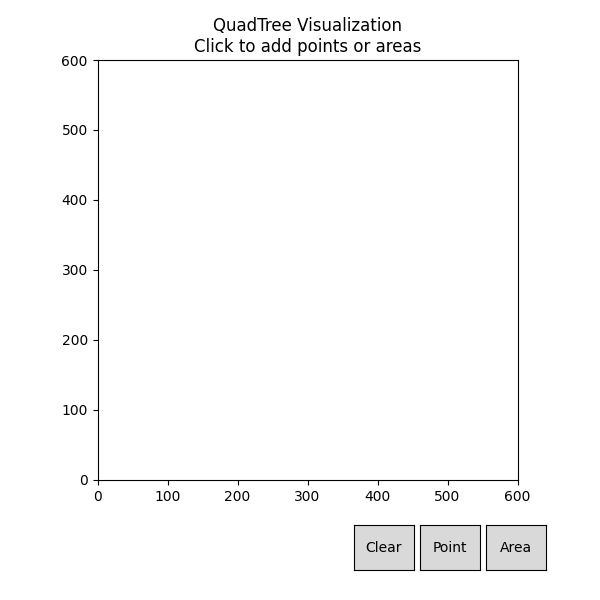

-----------------------------------------------------------------------
SELECTED POINTS:
(211.00000108991344, 329.71400669642856)
(279.571429661342, 345.4282924107142)
(366.71428680419916, 305.4282924107142)
(131.00000108991344, 229.71400669642853)
(135.28571537562772, 185.42829241071425)
(142.42857251848488, 168.28543526785708)
(183.85714394705627, 219.71400669642853)
(176.71428680419916, 251.14257812499991)
(226.71428680419916, 252.57114955357136)
(296.71428680419916, 299.71400669642856)
(279.571429661342, 243.9997209821428)
(266.71428680419916, 188.28543526785708)
(376.7142868041991, 196.85686383928564)
-----------------------------------------------------------------------
-----------------------------------------------------------------------
SELECTED POINTS:
(111.00000108991344, 173.9997209821428)
(96.71428680419916, 158.28543526785708)
-----------------------------------------------------------------------
-----------------------------------------------------------------------
S

In [56]:

%matplotlib widget
QT_visualizer = quadvis.QuadTreeVisualizer()
QT_visualizer.show()
%matplotlib inline


In [57]:
#Needed cleanup
plt.close('all')

# Porównanie i testy

## Funkcje

### Generowanie tabeli czasów CSV 

In [33]:
def csv_dump(table_name: str,data: List[Dict[str,int]],add_units=False):
    """
    Function that dumps the result of testing into a CSV file

    Args:
        table_name: Name of the file to which the result will be written
        data: An array of dictionaries that have 4 fields defined:
            > name: generator name
            > points: the amount of points generated 
            > kdtree: time of KD-Tree execution of build/query
            > quadtree: time of QuadTree execution of build/query
            > detected: points in the searched given area
    """
    
    content = "Nazwa zbioru;Ilość punktów dla zbioru; Czas obliczeń dla Drzewa KD;Czas obliczeń dla QuadTree;Punkty w obszarze\n"
    
    def wrap(number):
        return str(round(number,4)).replace('.',',')
    
    for row in data:
        value_KD = row['kdtree']
        value_Quad = row['quadtree']
        # The \\mu causes problems in excel sometimes (could as well in typst), so I will leave the macro prefix
        # unit_kdtree = ' \\mu s'
        # unit_quadtree = ' \\mu s'
        # If this causes problems in excel, delete the $ sign
        unit_kdtree = ' $mu$s'
        unit_quadtree = ' $mu$s'
        if int(value_KD) >= 1000:
            unit_kdtree = ' ms'
            value_KD /= 1000
        if int(value_Quad) >= 1000:
            unit_quadtree = ' ms'
            value_Quad /= 1000
        if int(value_KD) >= 1000:
            unit_kdtree = ' s'
            value_KD /= 1000
        if int(value_Quad) >= 1000:
            unit_quadtree = ' s'
            value_Quad /= 1000
        kdtree_time = wrap(value_KD)
        quadtree_time = wrap(value_Quad)
        content = content + f"{row['name']};{row['points']};{kdtree_time}{unit_kdtree if add_units else ''};{quadtree_time}{unit_quadtree if add_units else ''};{row['detected']}\n"
    
    output_filename = f"{table_name}.csv"
    
    with open(output_filename, "w", encoding='utf-8') as f:
        f.write(content)

    print(f"CSV data table has been written to {output_filename}")

In [34]:
csv_dump('testfile',[{'name':'test','points':2100,'kdtree':10000,'quadtree':10000000,'detected':37}])

CSV data table has been written to testfile.csv


#### Wizualizacja generowania punktów skupionych przy zadanej funkcji

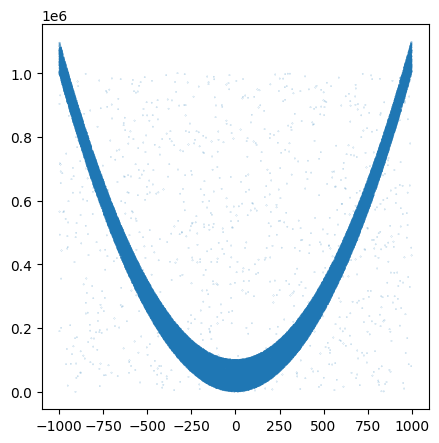

In [35]:
N = 10**5
K = 1000
points = line_generator(N,K,max_noise=100000,function=quadratic_function)
plt.figure(figsize=(5,5))
plt.scatter(*zip(*points),s=[0.01 for _ in range(N+K)])
plt.show()

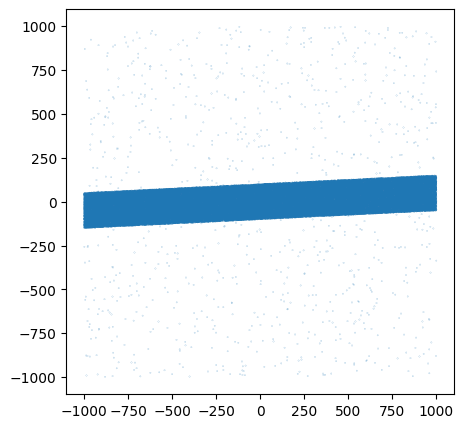

In [36]:
N = 10**5
K = 1000
points = line_generator(N,K,min_noise=-100,max_noise=100)
plt.figure(figsize=(5,5))
plt.scatter(*zip(*points),s=[0.01 for _ in range(N+K)])
plt.show()

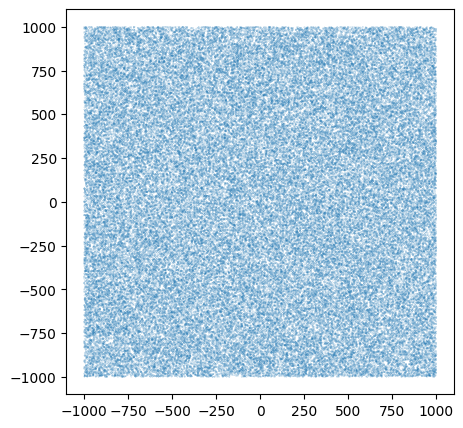

In [37]:
N = 10**5
K = 1000
points = points_generator(N)
plt.figure(figsize=(5,5))
plt.scatter(*zip(*points),s=[0.01 for _ in range(N)])
plt.show()